# Lab 3: ML Life Cycle: Modeling

In [4]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Decision Trees (DTs) and KNNs have many similarities. They are models that are fairly simple and intuitive to understand, can be used to solve both classification and regression problems, and are non-parametric models, meaning that they don't assume a particular relationship between the features and the label prior to training. However, KNNs and DTs each have their own advantages and disadvantages. In addition, one model may be better suited than the other for a particular machine learning problem based on multiple factors, such as the size and quality of the data, the problem-type and the hyperparameter configuration. For example, KNNs require feature values to be scaled, whereas DTs do not. DTs are also able to handle noisy data better than KNNs. 

Often times, it is beneficial to train multiple models on your training data to find the one that performs the best on the test data. 

In this lab, you will continue practicing the modeling phase of the machine learning life cycle. You will train Decision Trees and KNN models to solve a classification problem. You will experiment training multiple variations of the models with different hyperparameter values to find the best performing model for your predictive problem. You will complete the following tasks:
    
    
1. Build your DataFrame and define your ML problem:
    * Load the Airbnb "listings" data set
    * Define the label - what are you predicting?
    * Identify the features
2. Prepare your data:
    * Perform feature engineering by converting categorical features to one-hot encoded values
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Train multiple decision trees and evaluate their performances:
    * Fit Decision Tree classifiers to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of the models' predictions
    * Plot the accuracy of each DT model as a function of hyperparameter max depth
6. Train multiple KNN classifiers and evaluate their performances:
    * Fit KNN classifiers to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of the models' predictions
    * Plot the accuracy of each KNN model as a function of hyperparameter $k$
7. Analysis:
   * Determine which is the best performing model 
   * Experiment with other factors that can help determine the best performing model

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame


We will work with a new preprocessed, slimmed down version of the Airbnb NYC "listings" data set. This version is almost ready for modeling, with missing values and outliers taken care of. Also note that unstructured fields have been removed.

In [5]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "airbnbData_Prepared.csv")

<b>Task</b>: Load the data set into a Pandas DataFrame variable named `df`.

In [6]:
# YOUR CODE HERE
df = pd.read_csv(filename)

####  Inspect the Data

<b>Task</b>: In the code cell below, inspect the data in DataFrame `df` by printing the number of rows and columns, the column names, and the first ten rows. You may perform any other techniques you'd like to inspect the data.

In [7]:
# YOUR CODE HERE


print(df.shape)

print(df.columns.tolist())

print(df.head(10))

(28022, 43)
['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 

#### Define the Label

Assume that your goal is to train a machine learning model that predicts whether an Airbnb host is a 'super host'. This is an example of supervised learning and is a binary classification problem. In our dataset, our label will be the `host_is_superhost` column and the label will either contain the value `True` or `False`. Let's inspect the values in the `host_is_superhost` column.

In [8]:
df['host_is_superhost']

0        False
1        False
2        False
3        False
4        False
         ...  
28017    False
28018    False
28019     True
28020     True
28021    False
Name: host_is_superhost, Length: 28022, dtype: bool

#### Identify Features

Our features will be all of the remaining columns in the dataset. 

<b>Task:</b> Create a list of the feature names.

In [9]:
# YOUR CODE HERE
feature_names = [col for col in df.columns if col != 'host_is_superhost']
feature_names

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_ro

## Part 2. Prepare Your Data

Many of the data preparation techniques that you practiced in Unit two have already been performed and the data is almost ready for modeling. The one exception is that a few string-valued categorical features remain. Let's perform one-hot encoding to transform these features into numerical boolean values. This will result in a data set that we can use for modeling.

#### Identify the Features that Should be One-Hot Encoded

**Task**: Find all of the columns whose values are of type 'object' and add the column names to a list named `to_encode`.

In [10]:
# YOUR CODE HERE
to_encode = [col for col in df.columns if df[col].dtype == 'object']
to_encode

['neighbourhood_group_cleansed', 'room_type']

**Task**: Find the number of unique values each column in `to_encode` has:

In [11]:
# YOUR CODE HERE
for col in to_encode:
    print(f"{col}: {df[col].nunique()} unique values")

neighbourhood_group_cleansed: 5 unique values
room_type: 4 unique values


#### One-Hot Encode the Features

Instead of one-hot encoding each column using the NumPy `np.where()` or Pandas `pd.get_dummies()` functions, we can use the more robust `OneHotEncoder` transformation class from `sklearn`. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 


<b><i>Note:</i></b> We are working with `sklearn` version 0.22.2. You can find documentation for the `OneHotEncoder` class that that corresponds to our version of `sklearn` [here](https://scikit-learn.org/0.20/modules/generated/sklearn.preprocessing.OneHotEncoder.html). When choosing which features of the  `OneHotEncoder` class to use, do not use features that have been introduced in newer versions of `sklearn`. For example, you should specify the parameter `sparse=False` when calling `OneHotEncoder()` to create an encoder object. The documentation notes that the latest version of `sklearn` uses the `sparse_ouput` parameter instead of `sparse`, but you should stick with `sparse`.

<b>Task</b>: Refer to the documenation and follow the instructions in the code cell below to create one-hot encoded features.

In [12]:
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Create the encoder:
# Create the  Scikit-learn OneHotEncoder object below and assign to variable 'enc'.
# When calling OneHotEncoder(), specify that the 'sparse' parameter is False
enc = OneHotEncoder(sparse=False) # YOUR CODE HERE

# Apply the encoder:
# Use the method 'enc.fit_transform() to fit the encoder to the data (the two columns) and transform the data into 
# one-hot encoded values
# Convert the results to a DataFrame and save it to variable 'df_enc'
df_enc = enc.fit_transform(df[to_encode]) # YOUR CODE HERE

df_enc = pd.DataFrame(df_enc, columns=enc.get_feature_names(to_encode), index=df.index)

Let's inspect our new DataFrame `df_enc` that contains the one-hot encoded columns.

In [13]:
df_enc.head()

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Notice that the column names are numerical. 

<b>Task:</b> Complete the code below to reinstate the original column names.


In [14]:
# Use the method enc.get_feature_names() to resintate the original column names. 
# Call the function with the original two column names as arguments.
# Save the results to 'df_enc.columns'

df_enc.columns = enc.get_feature_names(to_encode)# YOUR CODE HERE

Let's inspect our new DataFrame `df_enc` once again.

In [15]:
df_enc.head(10)

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<b>Task</b>: You can now remove the original columns that we have just transformed from DataFrame `df`.


In [16]:
# YOUR CODE HERE
df.drop(columns=to_encode, inplace = True)

<b>Task</b>: You can now join the transformed features contained in `df_enc` with DataFrame `df`

In [17]:
# YOUR CODE HERE
df = df.join(df_enc)

Glance at the resulting column names:

In [18]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_r

## Part 3. Create Labeled Examples from the Data Set 

<b>Task</b>: Obtain the feature columns from DataFrame `df` and assign to `X`. Obtain the label column from DataFrame `df` and assign to `y`.


In [19]:
# YOUR CODE HERE
X = df.drop(columns=['host_is_superhost'])
y = df['host_is_superhost']

In [20]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:49
['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'n_host_

## Part 4. Create Training and Test Data Sets

<b>Task</b>: In the code cell below create training and test sets out of the labeled examples using Scikit-learn's `train_test_split()` function. Save the results to variables `X_train, X_test, y_train, y_test`.

Specify:
1. A test set that is one third (.33) of the size of the data set.
2. A seed value of '123'. 

In [21]:
# YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=123)

<b>Task</b>: Check the dimensions of the training and test datasets.

In [22]:
# YOUR CODE HERE
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (18774, 49)
X_test: (9248, 49)
y_train: (18774,)
y_test: (9248,)


## Part 5. Train Decision Tree Classifers and Evaluate their Performances

The code cell below contains a function definition named `train_test_DT()`. This function should:
1. train a Decision Tree classifier on the training data (Remember to use ```DecisionTreeClassifier()``` to create a model object.)
2. test the resulting model on the test data
3. compute and return the accuracy score of the resulting predicted class labels on the test data. 

<b>Task:</b> Complete the function to make it work.

In [33]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    
    # YOUR CODE HERE
    clf = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_leaf=leaf,
        criterion=crit,
        random_state=123
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

#### Train Two Decision Trees and Evaluate Their Performances

<b>Task:</b> Use your function to train two different decision trees, one with a max depth of $8$ and one with a max depth of $32$. Print the max depth and corresponding accuracy score.

In [69]:
# YOUR CODE HERE
acc_depth_8 = train_test_DT(X_train, X_test, y_train, y_test, depth=8)
print("Max depth: 8, Accuracy:", acc_depth_8)

acc_depth_32 = train_test_DT(X_train, X_test, y_train, y_test, depth=32)
print("Max depth: 32, Accuracy:", acc_depth_32)

acc_depth_8_leaf5 = train_test_DT(X_train, X_test, y_train, y_test, depth=8, leaf=5)
acc_depth_32_leaf5 = train_test_DT(X_train, X_test, y_train, y_test, depth=32, leaf=5)

print("Max depth: 8, min_samples_leaf=5, Accuracy:", acc_depth_8_leaf5)
print("Max depth: 32, min_samples_leaf=5, Accuracy:", acc_depth_32_leaf5)

Max depth: 8, Accuracy: 0.8334775086505191
Max depth: 32, Accuracy: 0.8069852941176471
Max depth: 8, min_samples_leaf=5, Accuracy: 0.8320717993079585
Max depth: 32, min_samples_leaf=5, Accuracy: 0.8080666089965398


#### Visualize Accuracy

We will be creating multiple visualizations that plot a specific model's hyperparameter value (such as max depth) and the resulting accuracy score of the model.

To create more clean and maintainable code, we will create one visualization function that can be called every time a plot is needed. 

<b>Task:</b> In the code cell below, create a function called `visualize_accuracy()` that accepts two arguments:

1. a list of hyperparamter values
2. a list of accuracy scores

Both lists must be of the same size.

Inside the function, implement a `seaborn` lineplot in which hyperparameter values will be on the x-axis and accuracy scores will be on the y-axis. <i>Hint</i>: You implemented a lineplot in this week's assignment.

In [72]:
# YOUR CODE HERE
def visualize_accuracy(hyperparameter_values, accuracy_scores):
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=hyperparameter_values, y=accuracy_scores, marker='o')
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Accuracy Score")
    plt.title("Model Accuracy vs. Hyperparameter Value")
    plt.grid(True)
    plt.show()

<b>Task</b>: Test your visualization function below by calling the function to plot the max depth values and accuracy scores of the two decision trees that you just trained.

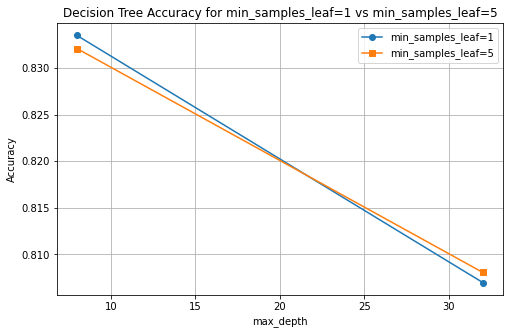

In [75]:
# YOUR CODE HERE

depths = [8, 32]
acc_original = [acc_depth_8, acc_depth_32]         
acc_leaf5 = [acc_depth_8_leaf5, acc_depth_32_leaf5] 

plt.figure(figsize=(8, 5))
plt.plot(depths, acc_original, marker='o', label='min_samples_leaf=1')
plt.plot(depths, acc_leaf5, marker='s', label='min_samples_leaf=5')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for min_samples_leaf=1 vs min_samples_leaf=5')
plt.legend()
plt.grid(True)
plt.show()




<b>Analysis</b>: Does this graph provide a sufficient visualization for determining a value of max depth that produces a high performing model?

I don’t think this graph is enough to find the best max depth for my model, because it only shows two points depth 8 and 32. With just these two, I can’t really see the full picture or know if another depth might work even better. To really figure out which max depth is best, I’d need to test more values and plot them all on the graph. That way, I could see which one gives me the highest accuracy. So, for now, this graph is just a starting point, but it’s not enough to make a good decision.



#### Train Multiple Decision Trees Using Different Hyperparameter Values and Evaluate Their Performances

<b>Task:</b> Let's train on more values for max depth.

1. Train six different decision trees, using the following values for max depth: $1, 2, 4, 8, 16, 32$
2. Use your visualization function to plot the values of max depth and each model's resulting accuracy score.

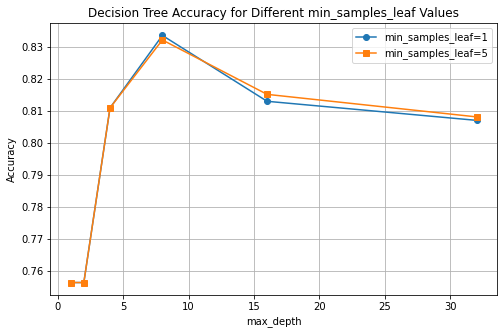

In [76]:
# YOUR CODE HERE
depths = [1, 2, 4, 8, 16, 32]
accuracies_leaf1 = []
accuracies_leaf5 = []

for d in depths:
    acc1 = train_test_DT(X_train, X_test, y_train, y_test, depth=d, leaf=1)
    acc5 = train_test_DT(X_train, X_test, y_train, y_test, depth=d, leaf=5)
    accuracies_leaf1.append(acc1)
    accuracies_leaf5.append(acc5)

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies_leaf1, marker='o', label='min_samples_leaf=1')
plt.plot(depths, accuracies_leaf5, marker='s', label='min_samples_leaf=5')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for Different min_samples_leaf Values')
plt.legend()
plt.grid(True)
plt.show()


<b>Analysis</b>: Analyze this graph. Pay attention to the accuracy scores. Answer the following questions in the cell below.<br>

How would you go about choosing the best model configuration based on this plot? <br>
What other hyperparameters of interest would you want to tune to make sure you are finding the best performing model?

Looking at the graph, I see that the accuracy increases as the max depth goes from 2 to 8, and the highest accuracy is at max depth 8. After that, as the tree gets even deeper 16, 32, the accuracy starts to go down. This means that max depth 8 gives me the best accuracy on my test set out of all the values I tried. So, I would pick max depth 8 for my model, because making the tree deeper after that point actually hurts performance, probably because the model is starting to overfit to the training data.
Besides max depth, I would also try changing things like min_samples_leaf, which sets the minimum number of samples in a leaf and helps prevent overfitting. I’d also look at criterion, which decides how the tree chooses where to split there are a couple of options for this, and sometimes one works better than the other. I’d try different values for min_samples_split too, since it controls how many samples we need to split a node. Another thing I might adjust is max_features, which controls how many features the tree considers at each split. By testing out these options, I can see what settings work best for my model.

## Part 6. Train KNN Classifiers and Evaluate their Performances


The code cell below contains function definition named `train_test_knn()`. This function should:
1. train a KNN classifier on the training data (Remember to use ```KNeighborsClassifier()``` to create a model object).
2. test the resulting model on the test data
3. compute and return the accuracy score of the resulting predicted class labels on the test data. 

<i>Note</i>: You will train KNN classifiers using the same training and test data that you used to train decision trees.

<b>Task:</b> Complete the function to make it work.

In [60]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    
    # YOUR CODE HERE
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

def train_test_knn1(X_train, X_test, y_train, y_test, k, weights='uniform'):
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

#### Train Three KNN Classifiers and Evaluate Their Performances

<b>Task:</b> Use your function to train three different KNN classifiers, each with a different value for hyperparameter $k$: $3, 30$, and $300$. <i>Note</i>: This make take a second.


In [61]:
# YOUR CODE HERE
acc_k3 = train_test_knn(X_train, X_test, y_train, y_test, k=3)
acc_k30 = train_test_knn(X_train, X_test, y_train, y_test, k=30)
acc_k300 = train_test_knn(X_train, X_test, y_train, y_test, k=300)

print("k = 3, Accuracy:", acc_k3)
print("k = 30, Accuracy:", acc_k30)
print("k = 300, Accuracy:", acc_k300)

acc_k3_uniform = train_test_knn1(X_train, X_test, y_train, y_test, k=3, weights='uniform')
acc_k3_distance = train_test_knn1(X_train, X_test, y_train, y_test, k=3, weights='distance')
acc_k30_uniform = train_test_knn1(X_train, X_test, y_train, y_test, k=30, weights='uniform')
acc_k30_distance = train_test_knn1(X_train, X_test, y_train, y_test, k=30, weights='distance')
acc_k300_uniform = train_test_knn1(X_train, X_test, y_train, y_test, k=300, weights='uniform')
acc_k300_distance = train_test_knn1(X_train, X_test, y_train, y_test, k=300, weights='distance')

print("k = 3, uniform weights Accuracy:", acc_k3_uniform)
print("k = 3, distance weights Accuracy:", acc_k3_distance)
print("k = 30, uniform weights Accuracy:", acc_k30_uniform)
print("k = 30, distance weights Accuracy:", acc_k30_distance)
print("k = 300, uniform weights Accuracy:", acc_k300_uniform)
print("k = 300, distance weights Accuracy:", acc_k300_distance)

k = 3, Accuracy: 0.759515570934256
k = 30, Accuracy: 0.7755190311418685
k = 300, Accuracy: 0.7696799307958477
k = 3, uniform weights Accuracy: 0.759515570934256
k = 3, distance weights Accuracy: 0.760705017301038
k = 30, uniform weights Accuracy: 0.7755190311418685
k = 30, distance weights Accuracy: 0.7816825259515571
k = 300, uniform weights Accuracy: 0.7696799307958477
k = 300, distance weights Accuracy: 0.7742214532871973


<b>Task:</b> Now call the function `visualize_accuracy()` with the appropriate arguments to plot the results.

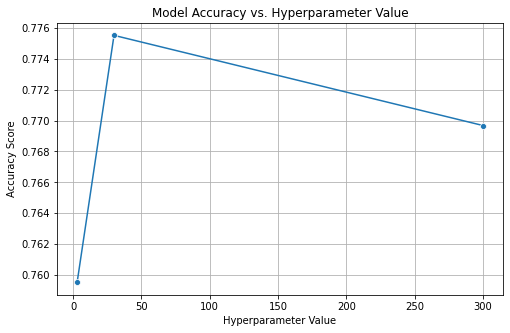

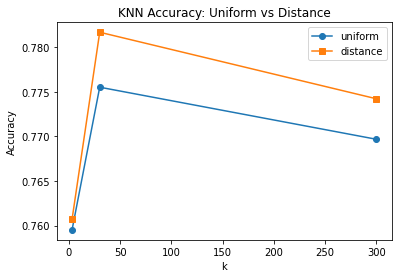

In [63]:
# YOUR CODE HERE

k_values = [3, 30, 300]
knn_accuracies = [acc_k3, acc_k30, acc_k300]

visualize_accuracy(k_values, knn_accuracies)

k_values = [3, 30, 300]
knn_accuracies_uniform = [acc_k3_uniform, acc_k30_uniform, acc_k300_uniform]
knn_accuracies_distance = [acc_k3_distance, acc_k30_distance, acc_k300_distance]

import matplotlib.pyplot as plt

plt.plot(k_values, knn_accuracies_uniform, marker='o', label='uniform')
plt.plot(k_values, knn_accuracies_distance, marker='s', label='distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy: Uniform vs Distance')
plt.legend()
plt.show()

#### Train Multiple KNN Classifiers Using Different Hyperparameter Values and Evaluate Their Performances

<b>Task:</b> Let's train on more values for $k$.

1. Array `k_range` contains multiple values for hyperparameter $k$. Train one KNN model per value of $k$
2. Use your visualization function to plot the values of $k$ and each model's resulting accuracy score.

<i>Note</i>: This make take a second.

In [67]:
k_range = np.arange(1, 40, step = 3) 
k_range


array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

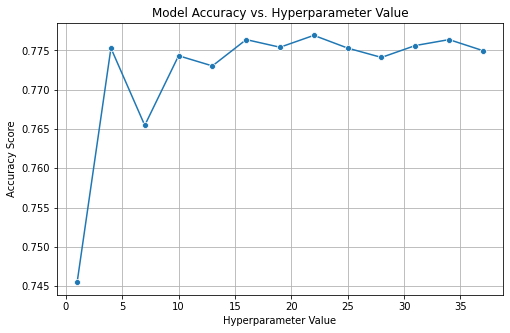

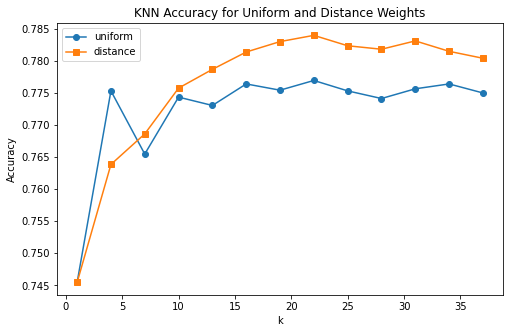

In [68]:
# YOUR CODE HERE
knn_accuracies = []
for k in k_range:
    acc = train_test_knn(X_train, X_test, y_train, y_test, k)
    knn_accuracies.append(acc)

visualize_accuracy(k_range, knn_accuracies)

knn_accuracies_uniform = []
knn_accuracies_distance = []

for k in k_range:
    acc_uniform = train_test_knn1(X_train, X_test, y_train, y_test, k, weights='uniform')
    acc_distance = train_test_knn1(X_train, X_test, y_train, y_test, k, weights='distance')
    knn_accuracies_uniform.append(acc_uniform)
    knn_accuracies_distance.append(acc_distance)

plt.figure(figsize=(8,5))  
plt.plot(k_range, knn_accuracies_uniform, marker='o', label='uniform')
plt.plot(k_range, knn_accuracies_distance, marker='s', label='distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Uniform and Distance Weights')
plt.legend()
plt.show()

## Part 7. Analysis

1. Compare the performance of the KNN model relative to the Decision Tree model, with various hyperparameter values. Which model performed the best (yielded the highest accuracy score)? Record your findings in the cell below.

2. We tuned hyperparameter $k$ for KNNs and hyperparamter max depth for DTs. Consider other hyperparameters that can be tuned in an attempt to find the best performing model. Try a different combination of hyperparamters for both KNNs and DTs, retrain the models, obtain the accuracy scores and record your findings below. 

    <i>Note:</i> You can consult Scikit-learn documentation for both the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class and the [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class to see how specific hyperparameters are passed as parameters to the model object.

1. When I compared the KNN and Decision Tree models using different hyperparameter values, I found that the Decision Tree model with a max depth of 8 had the highest accuracy score overall. The best KNN model did not reach the same level of accuracy as the Decision Tree. So, in my results, the Decision Tree performed better than KNN.

2.  Besides just changing k for KNN and max depth for Decision Tree, I also tried other options to see if I could make the models do even better. For the Decision Tree, I changed min_samples_leaf, which controls how many samples you need in a leaf, but it didn’t really improve the accuracy. For KNN, I changed the weights from uniform to distance, but that also didn’t make a big difference for my data. So, after testing these different hyperparameters, my first results were still the best ones.